# Minneapolis 2021 City Council Ward 2 Election 

* There are 6 candidates: 
    1. Robin Wonsley Worlobah ($R$)
    2. Yusra Arab ($Y$)
    3. Cam Gordon ($C$)
    4. Tom Anderson ($T$)
    5. Guy T. Gaskin ($G$)
    6. Undeclared Write-ins ($U$)

* According to the website [https://vote.minneapolismn.gov/results-data/election-results/2021/council-ward-2/](https://vote.minneapolismn.gov/results-data/election-results/2021/council-ward-2/): 
    * Total votes cast: 9,527	(This is the total votes counted in the first round. Does not include undervotes, overvotes, defective, or spoiled ballots.)
    * Tabulation threshold: 4,764 (This is the  number of votes sufficient for a candidate to be elected. Half of votes cast for office + 1, disregarding fractions.)
    * Undervotes: 272 (The ballots where the voter did not rank any candidates for the office.)

* Ranked Choice was used to elect a single winner: The winner was Robin Wonsley Worlobah. The Undeclared Write-ins, Guy T. Gaskin and Tom Anderson were eleminated in Round 2.  Cam Gordon was eliminated in Round 3, leaving Yusra Arab and Robin Wonsley Worlobah in Round 4. 

* There was a recount, but it did not change the outcome of the election. 

* Each voter was asked to rank 3 candidates.  The recorded ballots, downloaded from the website [https://vote.minneapolismn.gov/results-data/election-results/2021/council-ward-2/](https://vote.minneapolismn.gov/results-data/election-results/2021/council-ward-2/) are in the file ``2021-Ward-2-Cast-Vote-Record.csv``. 

* An *overvote* means that the voter assigned the same rank to two more more candidates, and an *undervote* means that the voter did assign a candidate to the given rank. 

* There is a top cycle among $R$, $Y$ and $C$. 

In [1]:
from pref_voting.profiles_with_ties import *
from pref_voting.voting_methods import *
import csv

In [2]:

with open('./edata/minneapolis_2021/2021-Ward-2-Cast-Vote-Record.csv', newline='') as f:
    reader = csv.reader(f)
    next(reader)
    rankings = list()
    rcounts = list()
    count_first = dict()
    #reader.next()
    for r in reader: 
        ranking = dict()
        if r[1] in count_first.keys(): 
            count_first[r[1]] += 1
        else: 
            count_first[r[1]] = 1
            
        for cidx, c in enumerate(r[1:4]):
            if  c =='overvote':
                #print(r)
                break
            else:
                if c != 'undervote':
                    if c[0] in ranking.keys(): 
                        # already have ranked this candidate
                        #print(" multiple ranking ", r)
                        continue
                    else: 
                        ranking[c[0]] = cidx + 1
        rankings.append(ranking)
        rcounts.append(int(r[4]))
            
prof = ProfileWithTies(rankings, rcounts=rcounts)
prof.report()

## uncomment to see the rankings
#prof.display_rankings()

# Use the extended strict preference in which all ranked candidates are strictly preferred 
# to all unranked candidates 
prof.use_extended_strict_preference()


There are 6 candidates and 9799 rankings:  
        The number of empty rankings: 280
        The number of rankings with ties: 0
        The number of linear orders: 0
        The number of truncated linear orders: 9519
        
The number of rankings with skipped ranks: 45
        
        


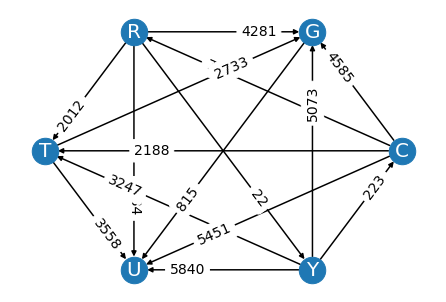

Remove candidate U to simplify the visualization, then display all the cycles: 

There is 1 cycle: 



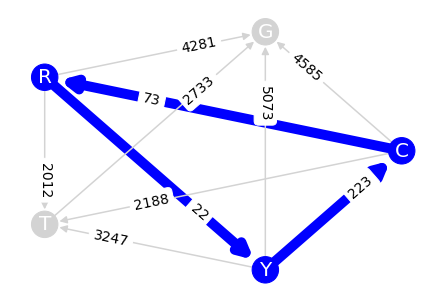

In [3]:
prof.display_margin_graph()

print("Remove candidate U to simplify the visualization, then display all the cycles: \n")
new_prof = prof.remove_candidates(['U'])
new_prof.use_extended_strict_preference()

new_prof.margin_graph().display_cycles()



In [4]:
def display_instant_runoff_results(prof): 
    
    rounds = list()
    
    remaining_candidates = prof.candidates
    
    while len(remaining_candidates) > 1: 
        reduced_prof = prof.remove_candidates([c for c in prof.candidates if c not in remaining_candidates])
        
        pl_scores = reduced_prof.plurality_scores_ignoring_overvotes()
        lowest_pl_score = min(pl_scores.values())
        cands_to_remove = [c for c in pl_scores.keys() if pl_scores[c] == lowest_pl_score]
        
        sorted_pl_scores = sorted(pl_scores.values(), reverse=True)
        sorted_cands = sorted(pl_scores.items(), reverse=True, key=lambda cpl: cpl[1])
        rounds.append('\n'.join([f"\t{prof.cmap[c]} plurality score: {pl_score}" for c, pl_score in sorted_cands]) + '\n' + f'\tThe candidate removed during this round: {reduced_prof.cmap[cands_to_remove[0]]}')
        remaining_candidates = [c for c in remaining_candidates if c not in cands_to_remove]
        
    for ridx, r in enumerate(rounds): 
        print(f"Instant Runoff round {ridx +1}")
        print(r)
        
    print(f"The IRV winner is {prof.cmap[remaining_candidates[0]]}")
    


In [5]:
display_instant_runoff_results(prof)

Instant Runoff round 1
	R plurality score: 2761
	Y plurality score: 2716
	C plurality score: 2507
	T plurality score: 980
	G plurality score: 546
	U plurality score: 9
	The candidate removed during this round: U
Instant Runoff round 2
	R plurality score: 2762
	Y plurality score: 2716
	C plurality score: 2507
	T plurality score: 981
	G plurality score: 547
	The candidate removed during this round: G
Instant Runoff round 3
	R plurality score: 2770
	Y plurality score: 2759
	C plurality score: 2598
	T plurality score: 1084
	The candidate removed during this round: T
Instant Runoff round 4
	Y plurality score: 3231
	R plurality score: 2877
	C plurality score: 2799
	The candidate removed during this round: C
Instant Runoff round 5
	R plurality score: 4054
	Y plurality score: 4032
	The candidate removed during this round: Y
The IRV winner is R


In [6]:

cw = prof.condorcet_winner()

if cw is None: 
    print("There is no Condorcet winner.")
else: 
    print(f"The Condorcet winner is {cw}.")

print()

split_cycle_faster.display(prof)
stable_voting.display(prof)
minimax.display(prof)
beat_path_faster.display(prof)
copeland.display(prof)

print()

cl = prof.condorcet_loser()

if cl is None: 
    print("There is no Condorcet loser.")
else: 
    print(f"The Condorcet loser is {cl}.")

There is no Condorcet winner.

Split Cycle winner is {Y}
Stable Voting winner is {Y}
Minimax winner is {Y}
Beat Path winner is {Y}
Copeland winners are {C, R, Y}

The Condorcet loser is U.


In [9]:
instant_runoff_for_truncated_linear_orders.display(prof)
irv_winner = instant_runoff_for_truncated_linear_orders(prof)[0]

print(f"The margins of {prof.cmap[irv_winner]} over each other candidate is: ")
for c in prof.candidates: 
    print(f"\tThe margin of R over {c} is {prof.margin('R', c)}")
    
print(f"\nThe candidate(s) that are majority preferred to {prof.cmap[irv_winner]}, the IRV winner: {', '.join([c for c in prof.candidates if prof.majority_prefers(c, irv_winner)])}")



Instant Runoff winner is {R}
The margins of R over each other candidate is: 
	The margin of R over C is -73
	The margin of R over G is 4281
	The margin of R over R is 0
	The margin of R over T is 2012
	The margin of R over U is 5084
	The margin of R over Y is 22

The candidate(s) that are majority preferred to R, the IRV winner: C
